In [1]:
import numpy as np
import pandas as pd

import scipy

import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
sns.set(rc={'figure.figsize':(9,7)})#Для более понятных графиков

In [2]:
# hw2_paring.py - 
df = pd.read_csv('../data/dataframe.csv', index_col=0)
print('Размеры',df.shape)
df.head()


Размеры (850, 9)


,full_name,birth_day,teach_place,degree,knowledge,teaching_skill,commication_skill,easy_exam,overall_score
0,Агаханов Назар Хангельдыевич,25 июня 1954,Кафедра высшей математики,Кандидат физико-математических наук (1988),4.87,4.78,4.79,4.27,4.80
1,Агаханова Яна Сергеевна,NaN,Кафедра высшей математики,Кандидат физико-математических наук (2007),4.52,4.64,4.85,4.81,4.82
2,Алексеев Василий Антонович,NaN,Кафедра высшей математики\n\nКафедра информатики,NaN,4.70,4.60,4.70,4.40,4.80
3,Амосов Григорий Геннадьевич,27 ноября 1972,Кафедра высшей математики,Доктор физико-математических наук,4.42,3.42,4.33,4.44,4.00
4,Андреев Михаил Юрьевич,NaN,Кафедра высшей математики,кандидат физико-математических наук,3.57,3.62,3.81,3.47,3.71


In [3]:
df.drop(['full_name','birth_day','teach_place', 'degree'], axis=1, inplace=True) # Удаление ненужных признаков

In [4]:
duplicateRows = df[df.duplicated()]                       # Удаление дублей , которые появились из-за того что некотороые преподователи имеют больше 1 кафедры
df_no_duplicates = df.drop_duplicates(keep='first')
print('Размеры',df.shape)
print('Размеры',df_no_duplicates.shape)
df_no_duplicates

Размеры (850, 5)
Размеры (613, 5)


,knowledge,teaching_skill,commication_skill,easy_exam,overall_score
0,4.87,4.78,4.79,4.27,4.80
1,4.52,4.64,4.85,4.81,4.82
2,4.70,4.60,4.70,4.40,4.80
3,4.42,3.42,4.33,4.44,4.00
4,3.57,3.62,3.81,3.47,3.71
...,...,...,...,...,...
835,3.50,3.00,2.50,3.50,3.50
841,4.50,3.00,3.00,1.00,2.50
842,4.29,4.00,3.50,3.20,4.00
843,4.29,4.00,3.86,2.40,4.17


In [5]:
df_no_duplicates.head()

,knowledge,teaching_skill,commication_skill,easy_exam,overall_score
0,4.87,4.78,4.79,4.27,4.80
1,4.52,4.64,4.85,4.81,4.82
2,4.70,4.60,4.70,4.40,4.80
3,4.42,3.42,4.33,4.44,4.00
4,3.57,3.62,3.81,3.47,3.71


In [6]:
df_no_nulls = df_no_duplicates.dropna()        # Удаляем преподователей без оценок
print(df_no_nulls.shape)
df_no_nulls

(598, 5)


,knowledge,teaching_skill,commication_skill,easy_exam,overall_score
0,4.87,4.78,4.79,4.27,4.80
1,4.52,4.64,4.85,4.81,4.82
2,4.70,4.60,4.70,4.40,4.80
3,4.42,3.42,4.33,4.44,4.00
4,3.57,3.62,3.81,3.47,3.71
...,...,...,...,...,...
835,3.50,3.00,2.50,3.50,3.50
841,4.50,3.00,3.00,1.00,2.50
842,4.29,4.00,3.50,3.20,4.00
843,4.29,4.00,3.86,2.40,4.17


In [7]:
# Для нормировки будем использовать RobustScaler т.к. он менее восприимчив к выбросам, чем другие
from sklearn.preprocessing import RobustScaler 


scaler = RobustScaler()
scaler = scaler.fit(df_no_nulls)



normal_data = pd.DataFrame(scaler.transform(df_no_nulls), columns=df_no_nulls.columns)
normal_data.head()

,knowledge,teaching_skill,commication_skill,easy_exam,overall_score
0,0.53125,0.520000,0.484600,0.522727,0.561702
1,0.09375,0.426667,0.533881,0.931818,0.578723
2,0.31875,0.400000,0.410678,0.621212,0.561702
3,-0.03125,-0.386667,0.106776,0.651515,-0.119149
4,-1.09375,-0.253333,-0.320329,-0.083333,-0.365957


In [8]:
normal_data.describe()

,knowledge,teaching_skill,commication_skill,easy_exam,overall_score
count,598.000000,598.000000,598.000000,598.000000,598.000000
mean,-0.343875,-0.181237,-0.224060,-0.106922,-0.195403
std,0.988572,0.631457,0.742272,0.671979,0.739386
min,-4.306250,-2.000000,-2.628337,-1.954545,-2.672340
25%,-0.668750,-0.666667,-0.646817,-0.553030,-0.617021
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.331250,0.333333,0.353183,0.446970,0.382979
max,0.693750,0.666667,0.657084,1.075758,0.731915


# Выделить кластеры (6 баллов)
* Определить оптимальное количество кластеров с помощью правила локтя/осыпи
* Получить номера класстеров для каждого пользователя. 

Score for number of cluster(s) 2: -809.467415667333
Score for number of cluster(s) 3: -580.2857645383784
Score for number of cluster(s) 4: -496.12360582789535
Score for number of cluster(s) 5: -426.78489161143307
Score for number of cluster(s) 6: -376.996183401578
Score for number of cluster(s) 7: -341.9481130611557
Score for number of cluster(s) 8: -320.64297076003595
Score for number of cluster(s) 9: -299.27313179231663
Score for number of cluster(s) 10: -282.03164697312627
Score for number of cluster(s) 11: -264.43255075052406


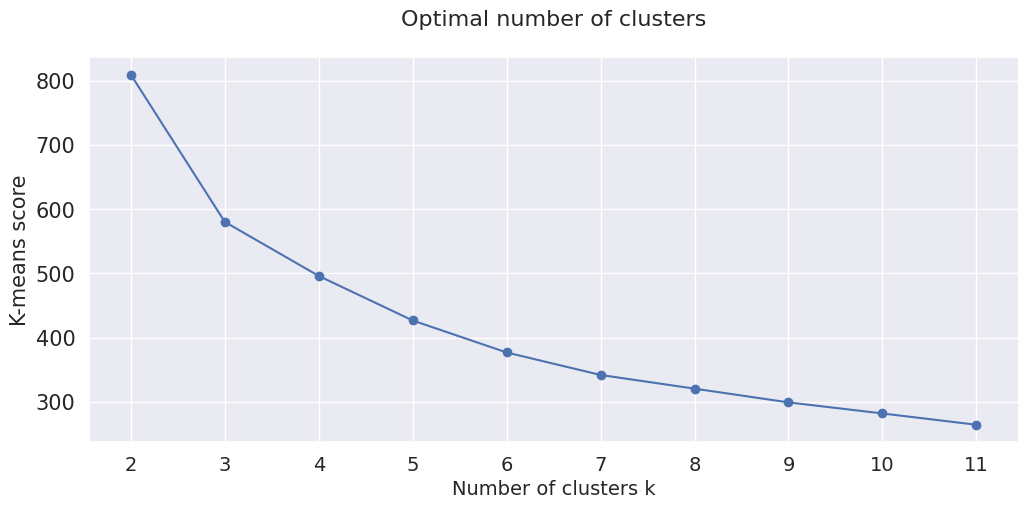

In [9]:
# Построим глафик локтя , чтобы определить оптимальное кол-во кластеров
from sklearn.cluster import KMeans

km_scores= []

for i in range(2,12):
    km = KMeans(n_clusters=i, random_state=42).fit(normal_data)
    preds = km.predict(normal_data)
    
    print("Score for number of cluster(s) {}: {}".format(i,km.score(normal_data)))
    km_scores.append(-km.score(normal_data))
    
    
plt.figure(figsize=(12,5))
plt.title("Optimal number of clusters\n",fontsize=16)
plt.plot([i for i in range(2,12)],km_scores, marker = 'o')
plt.grid(True)
plt.xlabel("Number of clusters k",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()


In [10]:
clusterer = KMeans(n_clusters=7, random_state=42, max_iter=500)
cluster_labels = clusterer.fit_predict(normal_data)              # Найдем соответствие каждого пользователя и кластера
cluster_labels

array([4, 4, 4, 0, 6, 3, 0, 4, 4, 4, 6, 2, 3, 4, 0, 2, 6, 1, 3, 2, 2, 4,
       0, 4, 0, 2, 5, 4, 2, 4, 6, 4, 2, 4, 4, 2, 2, 1, 4, 0, 0, 0, 4, 1,
       6, 4, 0, 4, 2, 3, 4, 0, 3, 4, 2, 4, 2, 3, 4, 3, 4, 4, 4, 6, 4, 1,
       0, 4, 4, 2, 0, 0, 2, 6, 2, 2, 6, 6, 3, 0, 3, 0, 1, 0, 4, 3, 4, 4,
       2, 4, 4, 4, 3, 2, 2, 4, 4, 4, 4, 4, 4, 1, 5, 3, 4, 3, 6, 3, 0, 4,
       0, 4, 4, 3, 4, 4, 4, 4, 4, 6, 0, 4, 4, 4, 4, 2, 2, 2, 0, 2, 4, 4,
       5, 3, 0, 0, 4, 0, 5, 4, 4, 0, 3, 3, 0, 0, 4, 4, 0, 2, 2, 1, 2, 0,
       4, 2, 2, 3, 0, 5, 5, 4, 6, 2, 1, 0, 3, 0, 0, 2, 4, 4, 4, 4, 4, 4,
       3, 4, 0, 2, 3, 6, 3, 0, 2, 0, 4, 6, 0, 4, 2, 4, 4, 6, 4, 0, 4, 6,
       5, 0, 0, 4, 4, 0, 3, 4, 2, 4, 3, 5, 2, 3, 6, 5, 4, 6, 4, 4, 3, 4,
       0, 4, 5, 5, 5, 4, 1, 2, 0, 4, 4, 0, 6, 0, 0, 4, 0, 5, 3, 4, 6, 0,
       0, 4, 5, 0, 0, 3, 2, 0, 2, 0, 0, 2, 6, 0, 6, 0, 2, 2, 0, 2, 6, 0,
       6, 4, 3, 0, 0, 5, 5, 4, 0, 1, 4, 0, 3, 2, 2, 0, 5, 0, 6, 0, 0, 4,
       6, 5, 0, 4, 4, 0, 2, 4, 0, 3, 0, 6, 0, 0, 3,

In [11]:
#Использование метода t-SNE для снижение размерности до 2
from sklearn.manifold import TSNE

data_x_y = TSNE(n_components=2, learning_rate='auto',
                random_state=22, n_jobs=-1, 
                init='random').fit_transform(normal_data)
data_x_y

array([[ 5.6672864 , 30.545076  ],
       [-1.6690543 , 30.06873   ],
       [ 1.0661409 , 28.338495  ],
       ...,
       [ 3.747437  , -7.8949738 ],
       [ 9.303356  , -4.555675  ],
       [-0.36637262,  2.766038  ]], dtype=float32)

<AxesSubplot: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

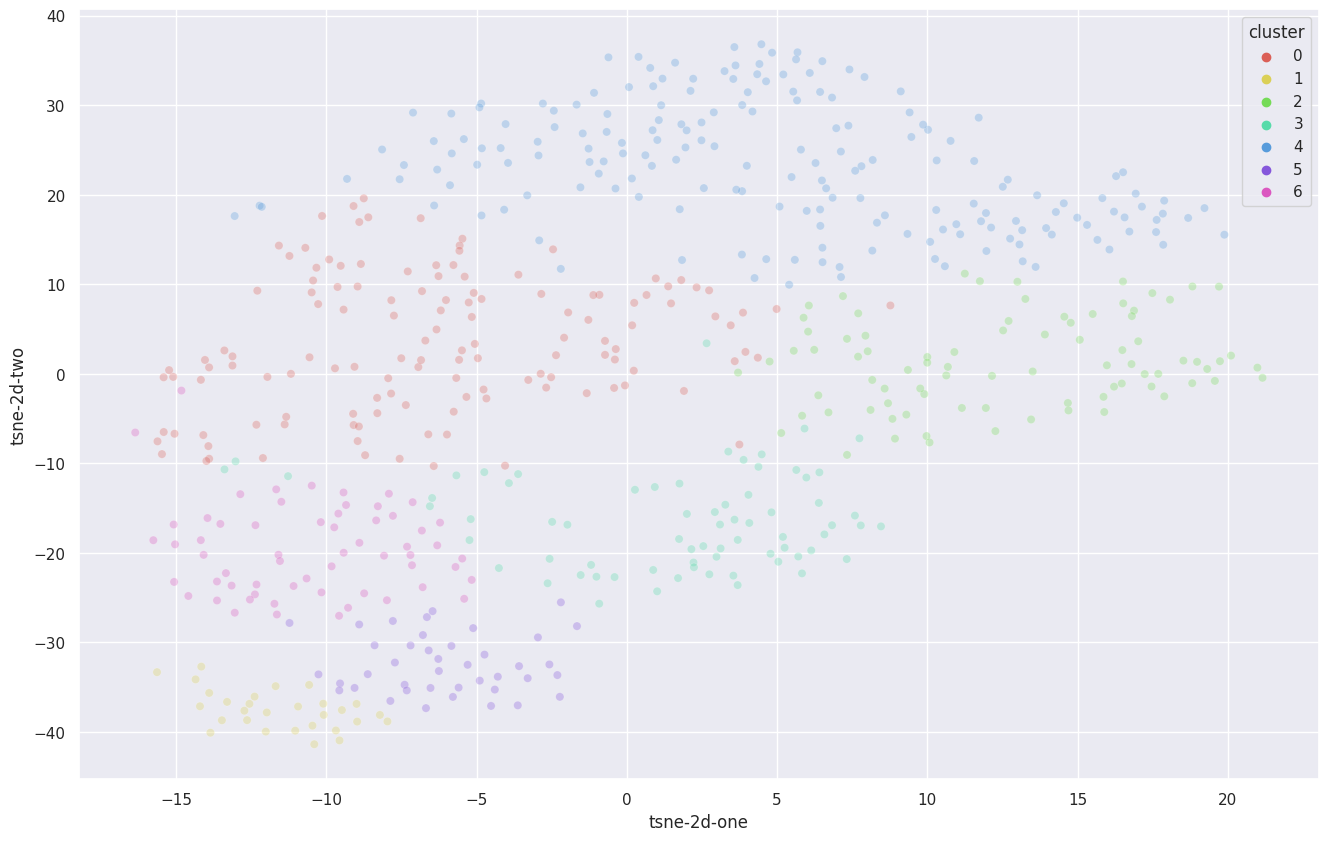

In [12]:
#Отрисовка кластеров
df_subset = pd.DataFrame()
df_subset['cluster'] = cluster_labels.tolist()     # Добавление столбца номера кластера
df_subset['tsne-2d-one'] = data_x_y[:,0]
df_subset['tsne-2d-two'] = data_x_y[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="cluster",
    palette=sns.color_palette("hls", 7),
    data=df_subset,
    legend="full",
    alpha=0.3
)